In [9]:
######## Import useful libraries ###########


import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder

%matplotlib inline 

# Predictive model

## I. Preparing Tabular Data

#### Upload pickled data

In [3]:
# Opening the Pickle train data set X
with open("train_TFIDF_SVD.pickle", 'rb') as f:
    train = pickle.load(f)

In [4]:
# Opening the Pickle validation set X
with open("test_TFIDF_SVD.pickle", 'rb') as f:
    test = pickle.load(f)

In [6]:
train['log_price'] = np.log1p(train['price'])
test['log_price'] = np.log1p(test['price'])

In [7]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_12,TFIDF_feature_13,TFIDF_feature_14,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,-0.018905,-0.014720,0.073910,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,-0.029146,-0.033790,0.042279,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,-0.000776,-0.051565,0.001984,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387


In [8]:
test.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_12,TFIDF_feature_13,TFIDF_feature_14,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price
11,New vs pi k body mists,1,Beauty,Fragrance,Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,0.002800,...,0.013971,-0.024795,0.021369,-0.031796,-0.003464,-0.004059,-0.056016,-0.001273,0.082264,3.555348
12,Black Skater dress,2,Women,Dresses,"Above Knee, Mini",rue,16.0,0,"Xl, great condition",0.009422,...,0.078102,-0.011156,0.039841,0.018697,-0.059675,-0.016977,-0.014195,-0.068884,-0.027390,2.833213
18,"Too Faced Limited ""Merry Macaroons""",1,Beauty,Makeup,Makeup Palettes,Too Faced,25.0,1,This AUTHENTIC pallete by Too Faced is brand n...,0.008357,...,-0.043025,-0.047108,0.067794,0.072071,0.025476,-0.072778,0.002481,0.062430,0.010215,3.258097


#### 2) Splitting data into training and validation sets

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 3) Dealing with categorical variables

In [15]:
# Brand

print("Handling categorical variables for 'brand_name'...")
lbl_enc_brand = LabelEncoder()

lbl_enc_brand.fit(np.hstack([train.brand_name, test.brand_name]))
train['brand'] = lbl_enc_brand.transform(train.brand_name)
test['brand'] = lbl_enc_brand.transform(test.brand_name)

print("Finished!")

Handling categorical variables for 'brand_name'...
Finished!


In [16]:
# Main category

print("Handling categorical variables for 'main_cat'...")
lbl_enc_main_cat = LabelEncoder()

lbl_enc_main_cat.fit(np.hstack([train.main_cat, test.main_cat]))
train['main_category'] = lbl_enc_main_cat.transform(train.main_cat)
test['main_category'] = lbl_enc_main_cat.transform(test.main_cat)

print("Finished!")

Handling categorical variables for 'main_cat'...
Finished!


In [17]:
# Subcategory 1

print("Handling categorical variables for 'subcat_1'...")
lbl_enc_subcat_1 = LabelEncoder()

lbl_enc_subcat_1.fit(np.hstack([train.subcat_1, test.subcat_1]))
train['category_1'] = lbl_enc_subcat_1.transform(train.subcat_1)
test['category_1'] = lbl_enc_subcat_1.transform(test.subcat_1)

print("Finished!")

Handling categorical variables for 'subcat_1'...
Finished!


In [18]:
# Subcategory 2

print("Handling categorical variables for 'subcat_2'...")
lbl_enc_subcat_2 = LabelEncoder()

lbl_enc_subcat_2.fit(np.hstack([train.subcat_2, test.subcat_2]))
train['category_2'] = lbl_enc_subcat_2.transform(train.subcat_2)
test['category_2'] = lbl_enc_subcat_2.transform(test.subcat_2)

print("Finished!")

Handling categorical variables for 'subcat_2'...
Finished!


In [19]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,main_category
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292,3523,29,162,1
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895,4137,95,69,9
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387,78,90,626,9


In [20]:
test.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,main_category
11,New vs pi k body mists,1,Beauty,Fragrance,Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,0.002800,...,-0.003464,-0.004059,-0.056016,-0.001273,0.082264,3.555348,4457,39,659,0
12,Black Skater dress,2,Women,Dresses,"Above Knee, Mini",rue,16.0,0,"Xl, great condition",0.009422,...,-0.059675,-0.016977,-0.014195,-0.068884,-0.027390,2.833213,4750,33,2,9
18,"Too Faced Limited ""Merry Macaroons""",1,Beauty,Makeup,Makeup Palettes,Too Faced,25.0,1,This AUTHENTIC pallete by Too Faced is brand n...,0.008357,...,0.025476,-0.072778,0.002481,0.062430,0.010215,3.258097,4278,59,374,0


#### 4) Vectorising the item full description

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 5) Forming final sets

In [22]:
y_train = train.log_price
y_valid = test.log_price
X_train = train.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description', 'log_price'], axis=1)
X_valid = test.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description', 'log_price'], axis=1)

In [23]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,brand,category_1,category_2,main_category
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3523,29,162,1
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,4137,95,69,9
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,78,90,626,9


In [24]:
y_train.head(3)

1    3.970292
2    2.397895
6    4.174387
Name: log_price, dtype: float64

#### 6) Saving pickle

In [25]:
#Saving our data-sets
y_train.to_pickle("y_train.pickle")
y_valid.to_pickle("y_valid.pickle")
X_train.to_pickle("X_train.pickle")
X_valid.to_pickle("X_valid.pickle")

## II. Fitting a predictive model

In [96]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,category_3
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292,3840,1541,1157,1155
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895,4522,5013,4678,641
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387,77,5013,4469,4767


## Linear regression

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model_lm = lm.fit(X_train, y_train)
predictions_lm = lm.predict(X_valid)

Coefficients: 
 [ -8.88602247e-02  -2.73403521e-01  -1.29176000e-01   1.11700292e-01
   1.65452858e-01  -5.86656271e-01   3.49820637e-01   3.93864800e-01
   1.95064727e-02   3.38779836e-01   5.65891090e-01  -1.20547955e+00
  -8.85735850e-01  -1.10129770e+00   6.26616795e-01   1.08774130e+00
  -4.70512409e-01   1.44930896e-01  -1.09325790e+00  -1.80323798e-02
   6.72060835e-01  -6.55279324e-01   1.12520000e-05  -9.16619859e-04
  -1.48674734e-04   3.14936186e-02]
Mean squared error: 0.50
R-squared: 0.11


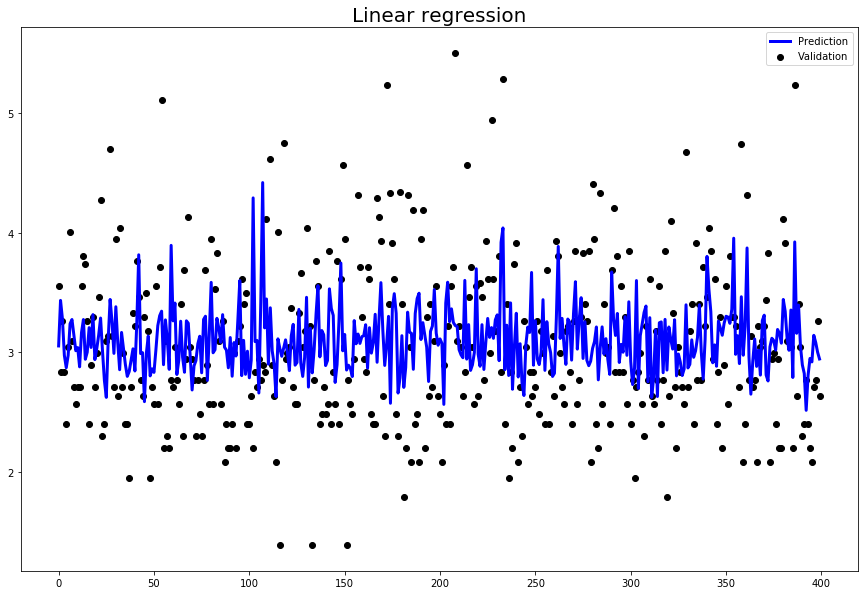

In [121]:
# The coefficients
print('Coefficients: \n', lm.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_lm))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_valid, predictions_lm))

# Plot outputs
plt.figure(figsize=(15,10))
nb_points = 400
plt.scatter(range(nb_points), y_valid[0:nb_points],  color='black', label="Validation")
plt.plot(range(nb_points), predictions_lm[0:nb_points], color='blue', linewidth=3, label="Prediction")
plt.title ('Linear regression', fontsize = 20)
plt.legend()

plt.show()

### Multi-layer Perceptron regressor

In [31]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()
model_mlpr = mlpr.fit(X_train, y_train)
predictions_mlpr = mlpr.predict(X_valid)

In [32]:
# save the model to disk
filename = 'finalized_model_mlpr.sav'
pickle.dump(model_mlpr, open(filename, 'wb'))

Mean squared error: 0.51


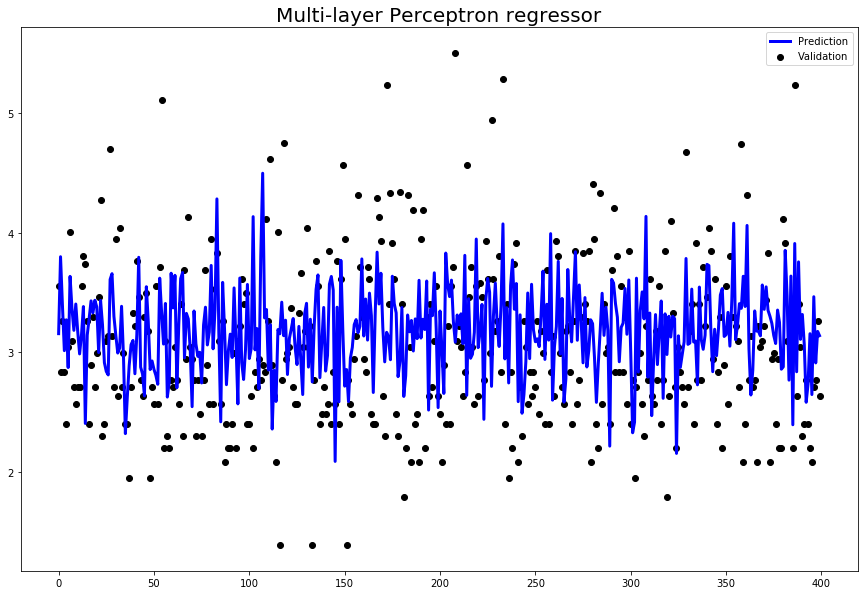

In [119]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_mlpr))

nb_points = 400
# Plot outputs
plt.figure(figsize=(15,10))
plt.scatter(range(nb_points), y_valid[0:nb_points],  color='black', label="Validation")
plt.plot(range(nb_points), predictions_mlpr[0:nb_points], color='blue', linewidth=3, label="Prediction")
plt.title ('Multi-layer Perceptron regressor', fontsize = 20)
plt.legend()

plt.show()

Let us explore the predicted values

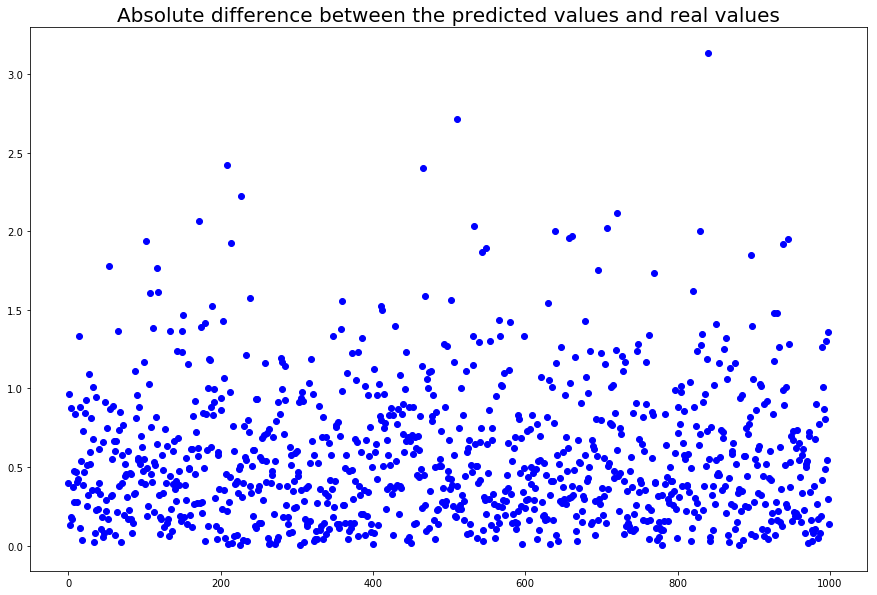

In [122]:
res = np.abs(y_valid -predictions_mlpr)

plt.figure(figsize=(15,10))
nb_points = 1000
plt.scatter(range(nb_points), res[0:nb_points],  color='blue')
plt.title ('Absolute difference between the predicted values and real values', fontsize = 20)
plt.show()

In [126]:
print('Minimal absolute difference between the prediction and real values is', round(res.min()), 'and maximum absolute value is', res.max())

Minimal absolute difference between the prediction and real values is 0.0 and maximum absolute value is 4.27610680057


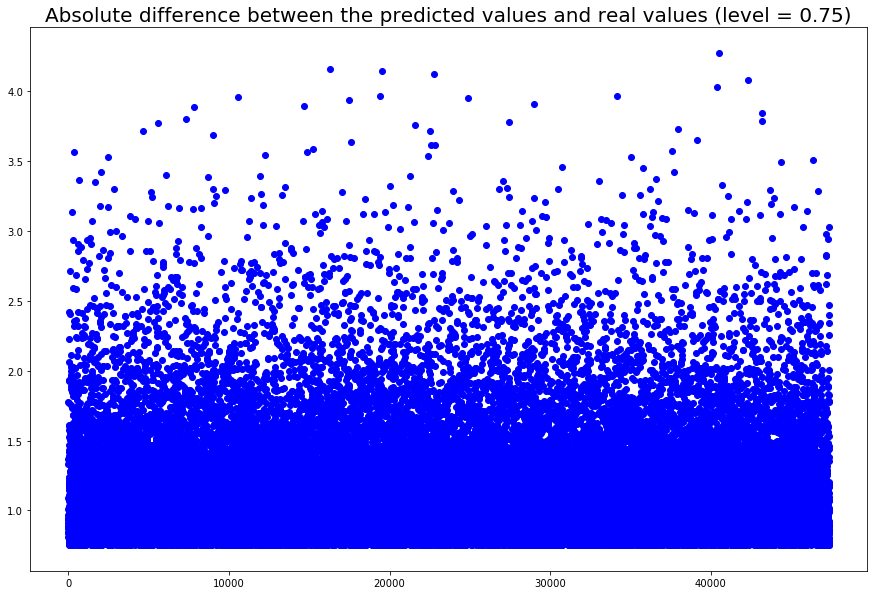

In [132]:
plt.figure(figsize=(15,10))
level = 0.75
plt.scatter(range(len(res[res > level])), res[res > level],  color='blue')
plt.title ('Absolute difference between the predicted values and real values (level = 0.75)', fontsize = 20)
plt.show()

In [134]:
print('The percentage of the predicted values with an absolute difference more than', level, 'is',len(res[res > 0.75])/len(res))

The percentage of the predicted values with an absolute difference more than 0.75 is 0.28075021636296815


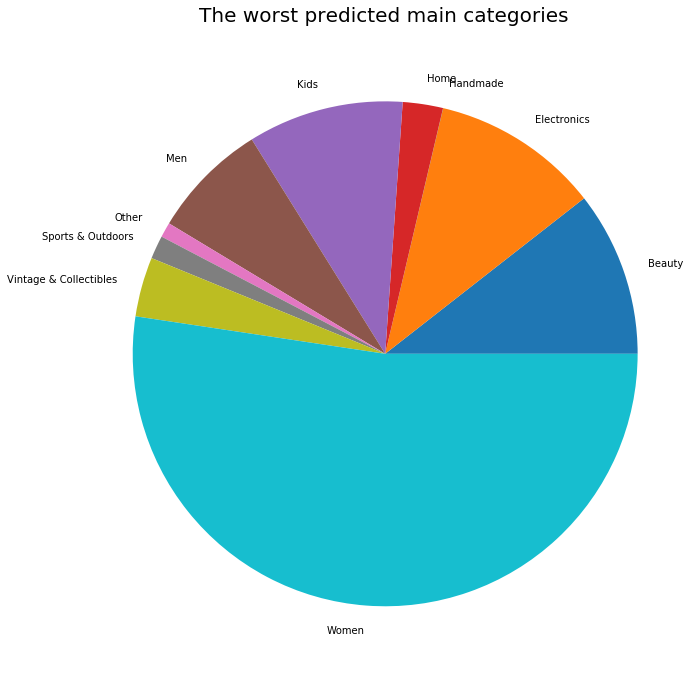

In [135]:
# Pie chart : 
plt.figure(figsize = (10,12))
test.name.groupby(test.main_cat[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted main categories', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

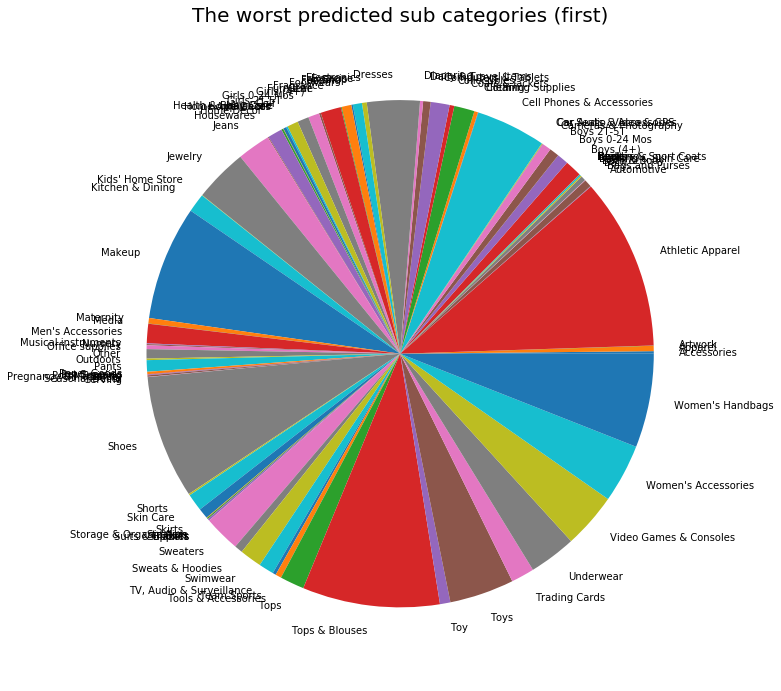

In [136]:
# Pie chart : 
plt.figure(figsize = (10,12))
test.name.groupby(test.subcat_1[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted sub categories (first)', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

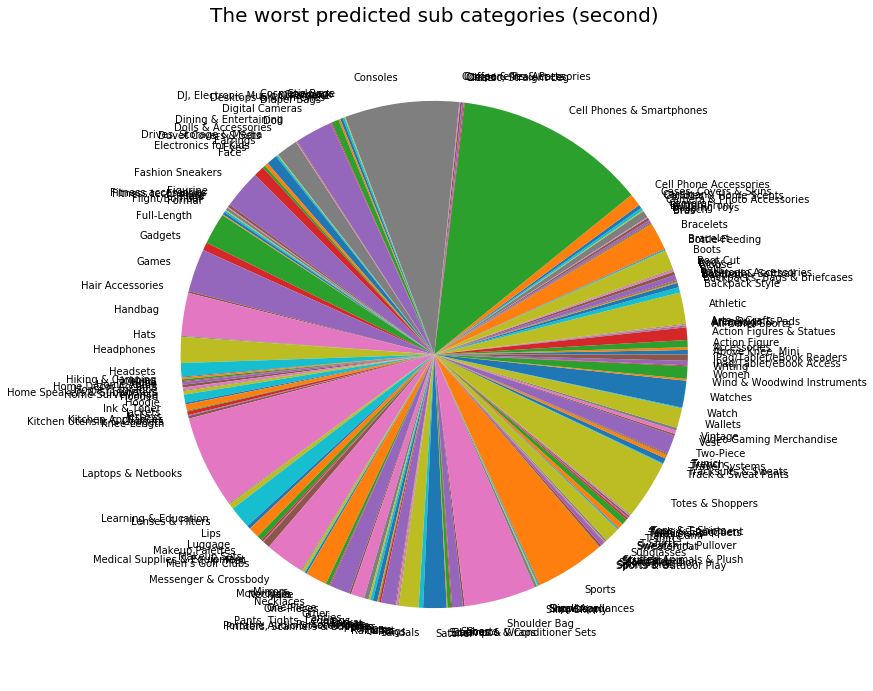

In [112]:
# Pie chart : 
plt.figure(figsize = (10,12))
level = 2
test.name.groupby(test.subcat_2[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted sub categories (second)', fontsize = 20)
plt.axis('equal')
plt.ylabel('')